# **1. DATA PREPARATION**

In [1]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\asus\anaconda3\lib\site-packages (0.13.2)



### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

### Preview Dataset

In [4]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


### Info Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Ada total 38 kolom dalam dataset Covid 19 Indonesia, dimana 12 di antaranya berisi tipe data objek / string, 12 memiliki data integer / bilangan bulat, dan 14 berisi tipe data float.

In [6]:
df.shape

(31822, 38)

Diketahui bahwa dataset memiliki jumlah kolom sebanyak 38 kolom dan terdiri dari 31.822 baris.

# **2. DATA CLEANSING**

#### Mengetahui karakteristik data dengan memeriksa jumlah data NULL dalam setiap kolom

In [7]:
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

Terlihat bahwa dalam beberapa kolom dataset berisi kolom dengan nilai kosong (NULL). Pada kolom "City or Regency", terdapat 31.822 nilai NULL, hal tersebut menunjukkan bahwa informasi tentang kota atau kabupaten tidak tersedia untuk entri-entri tersebut. Begitu juga dengan kolom "Province", "Island", "Time Zone", "Special Status", "Total Cities", "Total Urban Villages", "Total Rural Villages", "Growth Factor of New Cases", "Growth Factor of New Deaths". Setelah memahami isi data dengan membaca deskripsi tiap kolom, kita dapat menetukan kolom mana saja yang tidak terlalu penting dan harus di drop.

#### Drop kolom yang tidak dibutuhkan

Kolom yang akan di drop yaitu 'Location ISO Code', 'City or Regency', 'Country', 'Continent', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Regencies', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Growth Factor of New Cases', dan 'Growth Factor of New Deaths'.

In [8]:
df.drop(['Location ISO Code', 'City or Regency', 'Country', 'Continent', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Regencies', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Growth Factor of New Cases', 'Growth Factor of New Deaths'], axis=1, inplace=True)

#### Mengubah tipe data "Date" menjadi tipe data datetime untuk menghindari kesalahan dalam pengurutan time-series dalam visualisasi.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

#### Latest Dataset Preview

In [10]:
df.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Island,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,51.28%,192.31%
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,48.78%,182.93%
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,265185520,138.34,113.921327,-0.789275,0.00,0.00%,0.00%
3,2020-03-02,Riau,1,0,0,1,1,0,1,0,Province,Riau,Sumatera,6074100,69.80,101.805109,0.511648,0.00,0.00%,100.00%
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,46.51%,174.42%


#### Latest Dataset Info

Untuk melihat perubahan yang sudah dilakukan.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    31822 non-null  datetime64[ns]
 1   Location                31822 non-null  object        
 2   New Cases               31822 non-null  int64         
 3   New Deaths              31822 non-null  int64         
 4   New Recovered           31822 non-null  int64         
 5   New Active Cases        31822 non-null  int64         
 6   Total Cases             31822 non-null  int64         
 7   Total Deaths            31822 non-null  int64         
 8   Total Recovered         31822 non-null  int64         
 9   Total Active Cases      31822 non-null  int64         
 10  Location Level          31822 non-null  object        
 11  Province                30893 non-null  object        
 12  Island                  30893 non-null  object

Kini terlihat bahwa dataset memiliki 20 kolom.

# **3. EXPLORATORY DATA ANALYSIS (EDA)**

## Question 1 : Pada tanggal berapa jumlah kasus baru COVID 19 terbanyak dilaporkan dalam satu hari?

**1.1** Memfilter data berdasarkan kolom 'New Cases', lalu menampilkan 8 data dengan jumlah kasus baru COVID 19 terbanyak yang dilaporan dalam satu hari beserta tanggalnya (kolom 'Date'). Lalu menampilkan kolom 'Location' untuk menunjukkan bahwa angka 'New Cases' di-akumulatif tidak dari satu lokasi saja (akumulatif dari seluruh wilayah di Indonesia per tanggal terkait).

In [12]:
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]
top_8_date_new_cases

,Date,New Cases,Location
0,2022-02-16,64718,Indonesia
1,2022-02-17,63956,Indonesia
2,2022-02-23,61488,Indonesia
3,2022-02-18,59635,Indonesia
4,2022-02-19,59384,Indonesia
5,2022-02-22,57491,Indonesia
6,2022-02-24,57426,Indonesia
7,2022-02-15,57049,Indonesia


**1.2** Visualisasi kenaikan 'New Cases' berdasarkan urutan 8 tanggal dengan kasus COVID 19 paling banyak per hari.

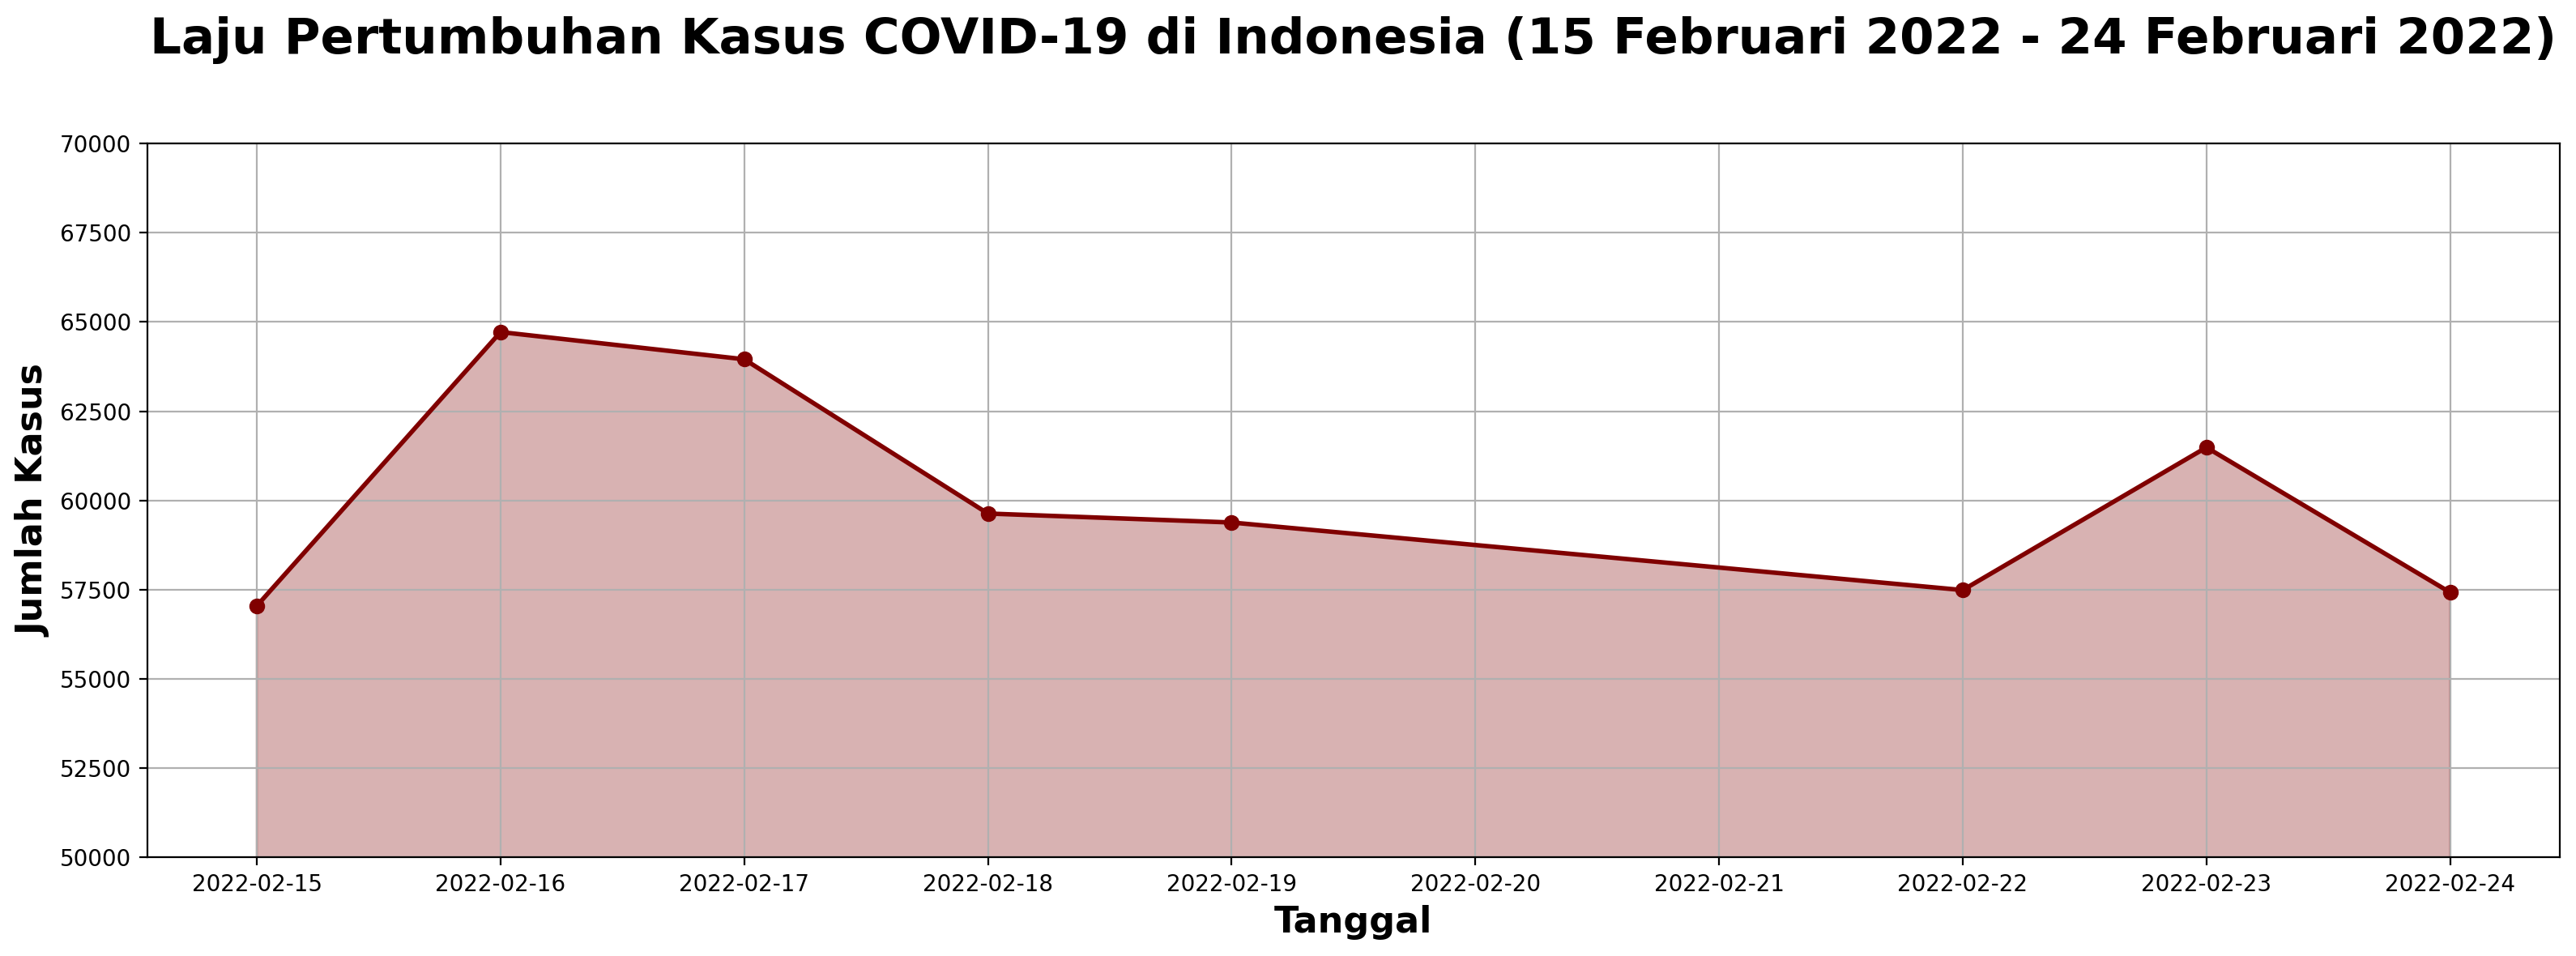

In [13]:
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]

x1_2 = list(top_8_date_new_cases.sort_values(by='Date')['Date'])
y1_2 = list(top_8_date_new_cases.sort_values(by='Date')['New Cases'])

# Plotting visualisasi dengan area chart
plt.figure(figsize=(16, 6), dpi=200)
plt.fill_between(x1_2, y1_2, color='maroon', alpha=0.3)  # Area chart dengan warna maroon dan opacity 0.3
plt.plot(x1_2, y1_2, color='maroon', marker='o', linestyle='-', linewidth=2)  # Garis plot untuk detail data
plt.ylim(ymin=50000, ymax=70000)
plt.title('Laju Pertumbuhan Kasus COVID-19 di Indonesia (15 Februari 2022 - 24 Februari 2022)', fontsize=22, fontweight='bold', pad=40)
plt.xlabel('Tanggal', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Kasus', fontsize=16, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa pertumbuhan kasus dimulai semenjak pertengahan bulan Februari 2022 yakni pada tanggal 15 Februari kemudian mengalami lonjakan yang drastis pada **16 Februari 2022**, dimana jumlah kasus baru COVID 19 yang paling banyak ditemukan dalam satu hari yaitu di tanggal tersebut dengan jumlah kasus sebanyak **64.718** kasus. Lalu sempat mengalami penurunan pada 17 Februari hingga 22 Februari, namun mengalami peningkatan kembali pada 23 Februari. Kemudian di tanggal 24 Februari jumlah kasus kembali menurun. 

Berdasarkan tabel dan visualisasi data di atas, diketahui bahwa dari 8 tanggal teratas dengan kasus COVID 19 terbanyak per-harinya berada pada bulan Februari 2022.

## Question 2 : Provinsi mana yang memiliki jumlah kasus baru terbanyak per hari?

**2.1** Mengurutkan 5 provinsi dengan penemuan kasus COVID 19 terbanyak per hari dengan memfilter data dari kolom **New Cases** lalu menampilkan provinsinya (kolom **Province**).

In [15]:
df_not_ll = df.loc[df['Location Level'] == 'Province'].sort_values(by='New Cases', ascending=False)[['Province', 'New Cases']]
df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]

,New Cases
Province,
DKI Jakarta,1412474
Jawa Barat,1173731
Jawa Tengah,636409
Jawa Timur,601534
Banten,333875


**2.2** Visualisasi perbandingan antar provinsi dengan total penemuan kasus COVID 19 tertinggi per hari.

In [16]:
a22 = df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]
x2_2 = list(a22.to_dict()['New Cases'].keys())
y2_2 = list(a22.to_dict()['New Cases'].values())

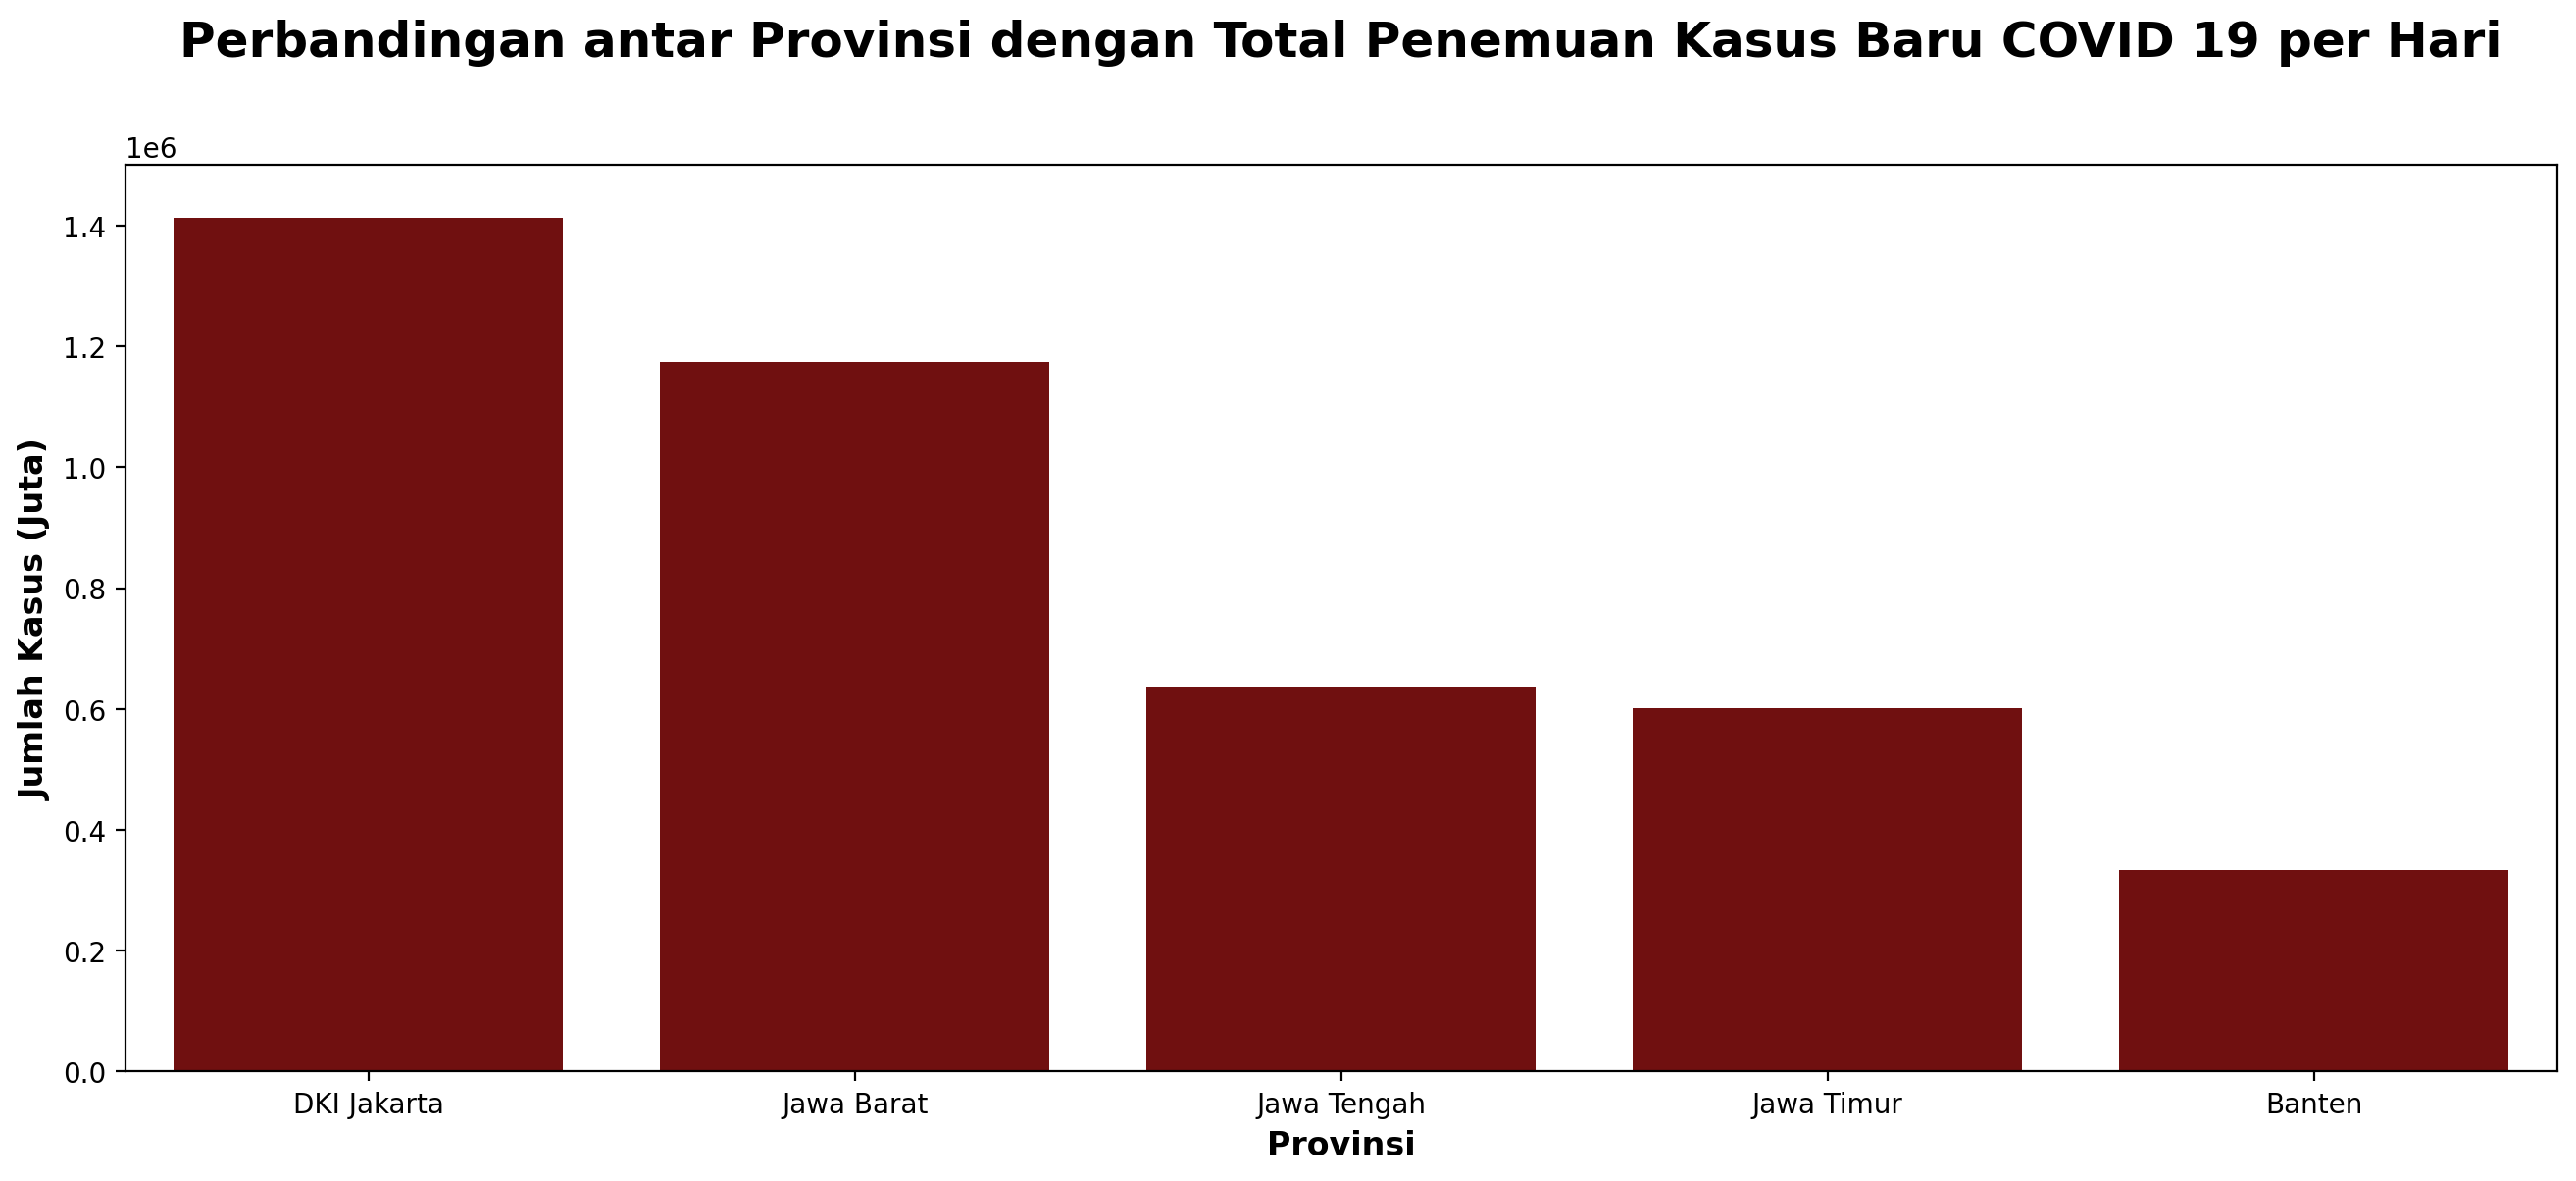

In [17]:
plt.style.use('default')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.barplot(x=x2_2, y=y2_2, color='maroon')
plt.ylim(ymax=1500000)
plt.title('Perbandingan antar Provinsi dengan Total Penemuan Kasus Baru COVID 19 per Hari', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Provinsi', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kasus (Juta)', fontsize=12, fontweight='bold')
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa Provinsi **DKI Jakarta** memiliki total kasus tertinggi per harinya sebanyak **1.412.474** kasus, kemudian diikuti oleh Provinsi Jawa Barat, Jawa Tengah, Jawa Timur, dan Banten.

## Question 3 : Pulau mana yang memiliki jumlah kasus COVID 19 tertinggi per hari?

**3.1** Melihat pulau dengan jumlah kasus terbanyak per hari dengan memfilter data dari kolom **New Cases**, lalu menampilkan nama pulaunya (kolom **Island**).

In [18]:
top_islands_new_cases = df.loc[df.Island != None].groupby(['Island'])[['New Cases']].sum().sort_values(by='New Cases', ascending=False)
top_islands_new_cases

,New Cases
Island,
Jawa,4382330
Sumatera,822718
Kalimantan,465732
Sulawesi,313608
Nusa Tenggara,297493
Papua,82097
Maluku,33331


**3.2** Visualisasi perbandingan tiap pulau dengan total kasus per hari terbanyak.

In [19]:
x3_2 = list(top_islands_new_cases.to_dict()['New Cases'].keys())
y3_2 = list(top_islands_new_cases.to_dict()['New Cases'].values())

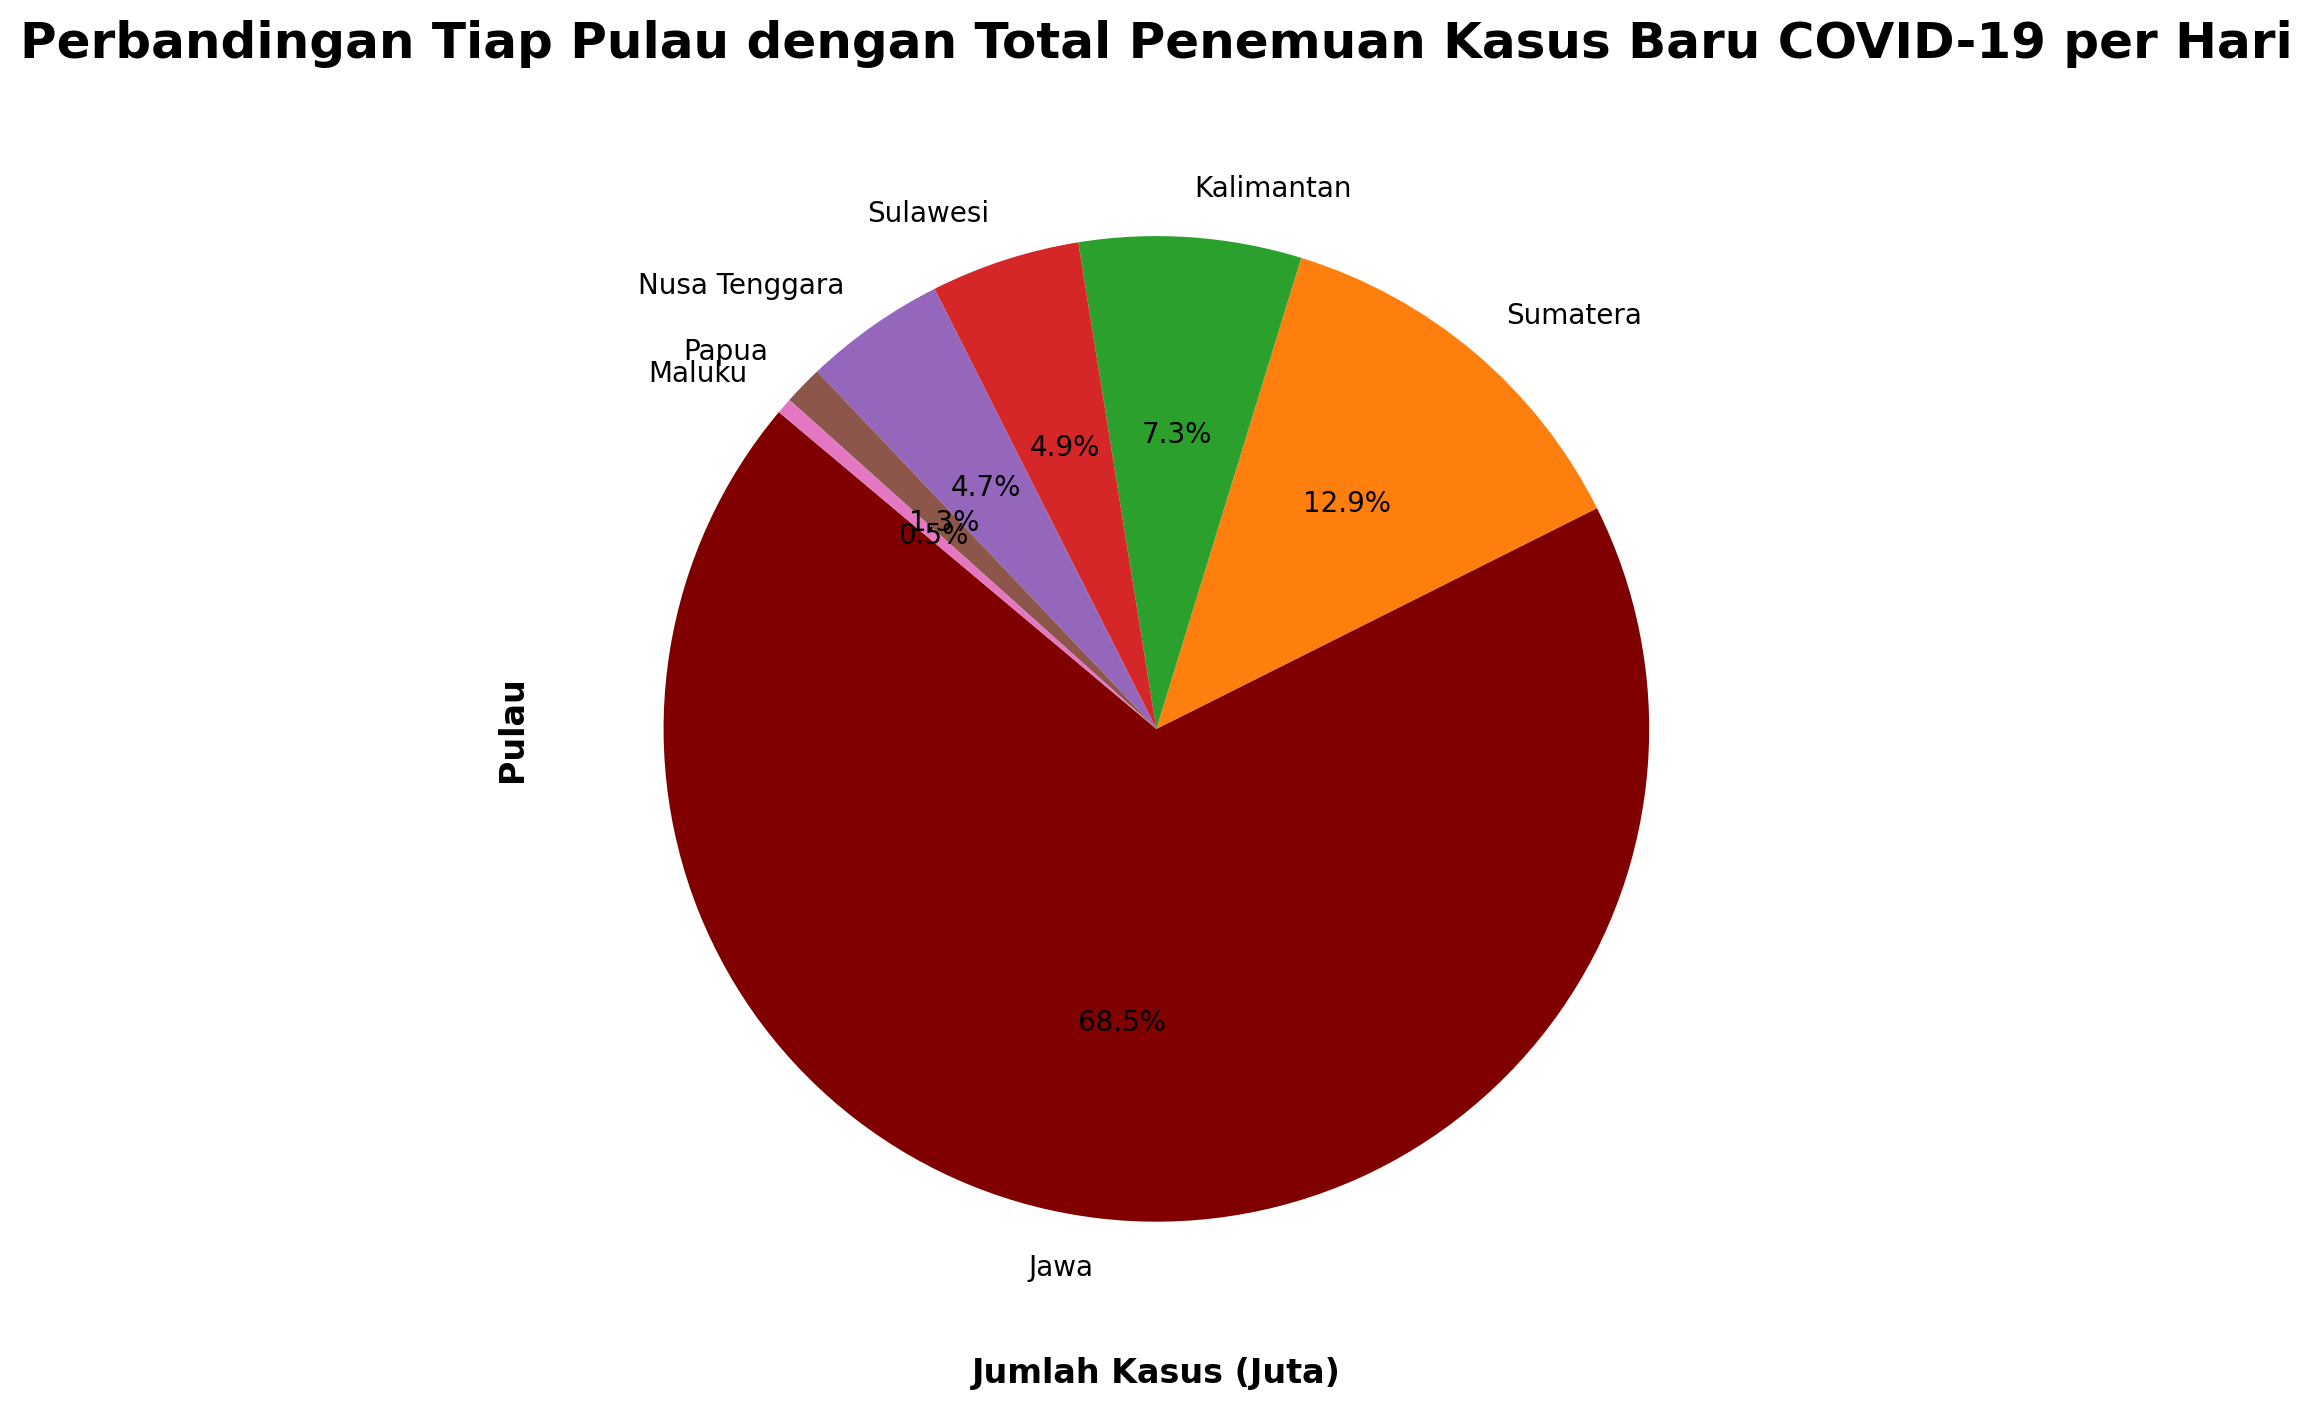

In [20]:
# Mengatur ukuran visualisasi
plt.figure(figsize=(12, 8), dpi=200)

# Membuat pie chart
plt.pie(y3_2, labels=x3_2, colors=['maroon', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], autopct='%1.1f%%', startangle=140)

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Tiap Pulau dengan Total Penemuan Kasus Baru COVID-19 per Hari', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Jumlah Kasus (Juta)', fontsize=12, fontweight='bold')
plt.ylabel('Pulau', fontsize=12, fontweight='bold')

# Menampilkan pie chart
plt.show()

Berdasarkan visualisasi di atas, total penemuan kasus COVID 19 per hari terbanyak berpusat di pulau **Jawa** dengan jumlah kasus yang menembus hingga **4 juta** kasus per harinya. Perbandingan terlihat sangat mencolok jika dibandingkan dengan total penemuan kasus COVID 19 per hari di pulau lain. Hal ini menunjukkan bahwa hasil visualisasi di atas sesuai dengan analisa sebelumnya dimana 5 provinsi dengan total penemuan kasus COVID 19 per hari terbanyak berada di pulau Jawa.

## Question 4 : Provinsi manakah yang memiliki angka kesembuhan harian tertinggi?

**4.1** Mengurutkan provinsi dengan angka kesembuhan paling tinggi per hari dengan memfilter data dari kolom **New Recovered**, lalu menampilkan nama provinsinya (kolom **Province**)

In [21]:
top_province_new_rcvry = df.loc[df['Location Level'] == 'Province'].groupby(['Province'])[['New Recovered']].sum().sort_values(by='New Recovered', ascending=False)
top_province_new_rcvry[:10]

,New Recovered
Province,
DKI Jakarta,1386059
Jawa Barat,1144298
Jawa Tengah,601506
Jawa Timur,568666
Banten,328372
Daerah Istimewa Yogyakarta,217710
Kalimantan Timur,203019
Bali,161626
Sumatera Utara,154914


**4.2** Visualisasi perbandingan provinsi dengan angka kesembuhan tertinggi per hari.

In [22]:
x4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].keys())
y4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].values())

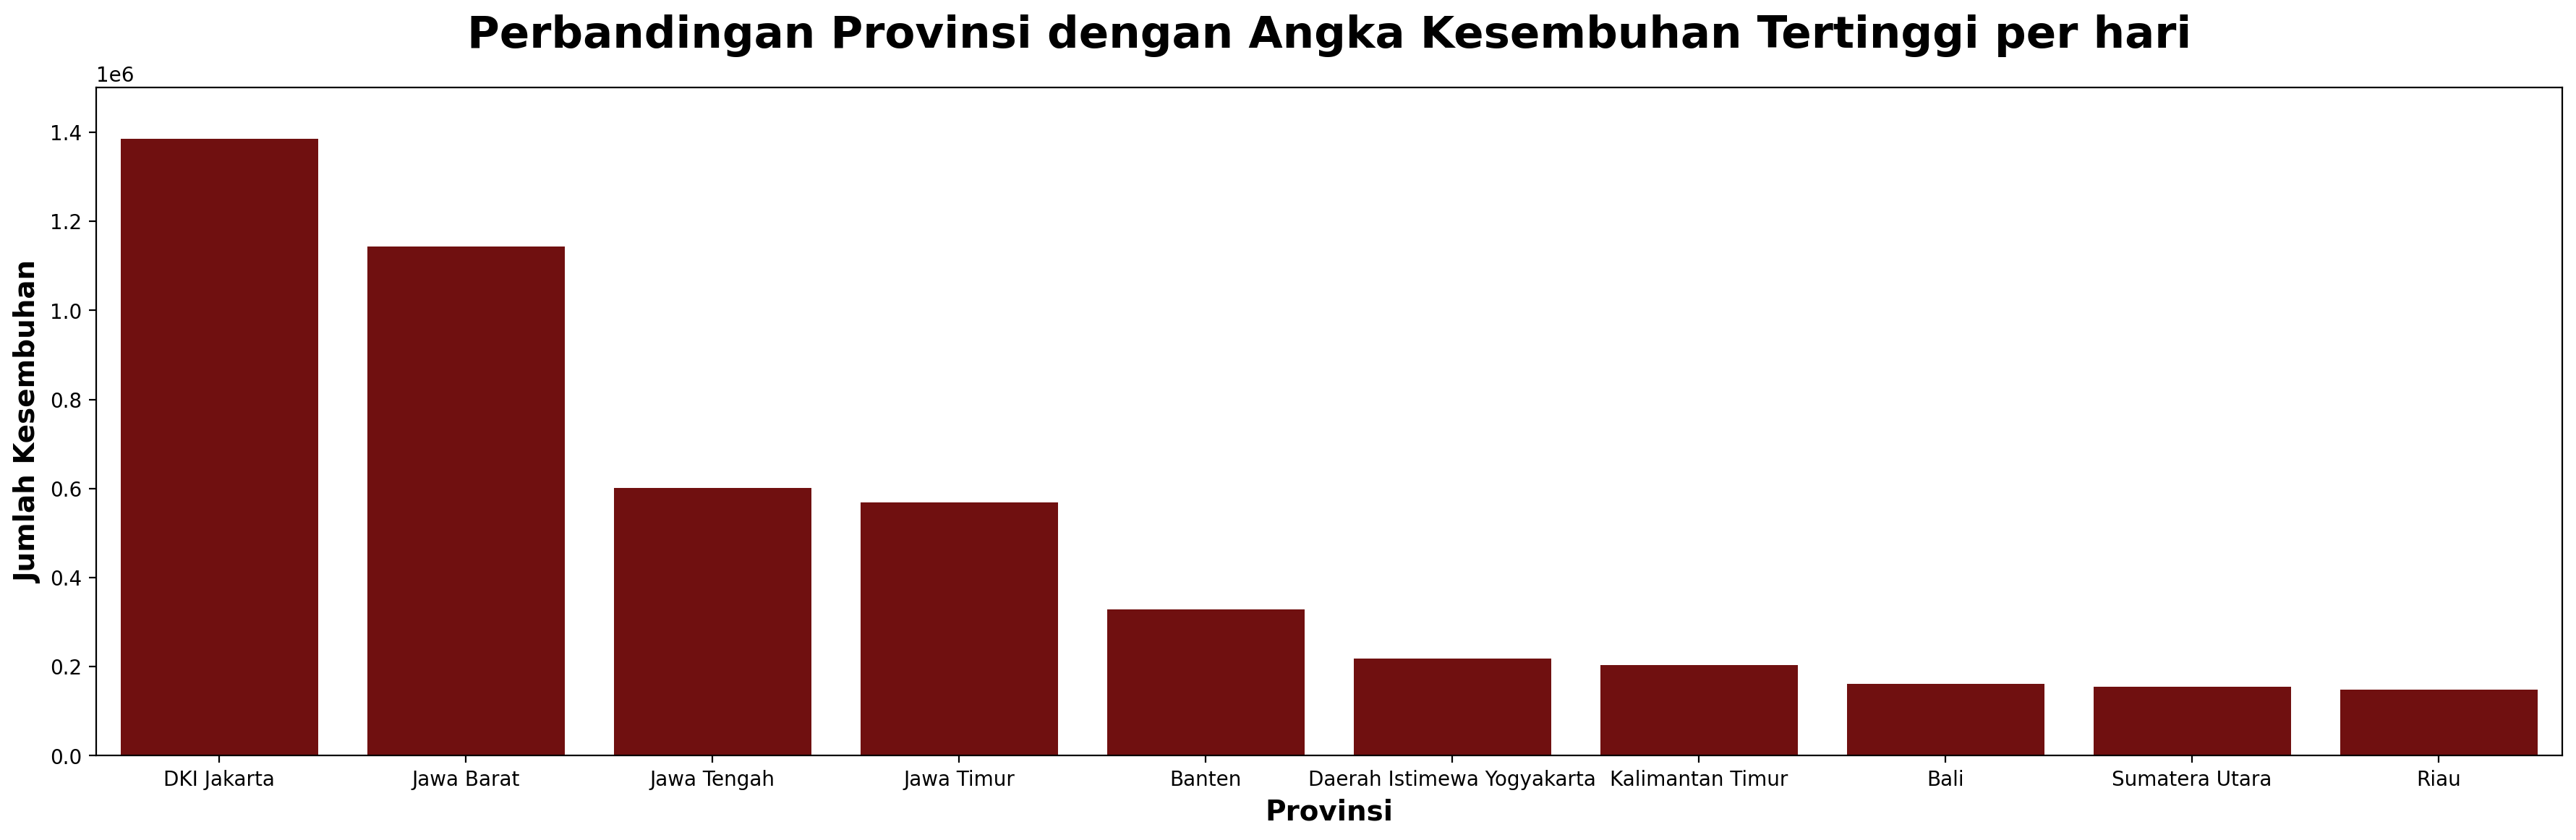

In [23]:
plt.style.use('default')
fg, ax = plt.subplots(figsize=(22,6), dpi=200)
sns.barplot(x=x4_2, y=y4_2, color='#800000')
plt.title('Perbandingan Provinsi dengan Angka Kesembuhan Tertinggi per hari', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Provinsi', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Kesembuhan', fontsize=14, fontweight='bold')
plt.ylim(ymax=1500000)
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa provinsi **DKI Jakarta** unggul dalam angka kesembuhan per harinya sebanyak **1.386.059**, dimana hampir sembilan kali lipat dari provinsi Riau yang menempati posisi terbawah dalam jumlah angka kesembuhan kasus COVID 19 per hari yaitu sebanyak 147.972.